In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2

In [5]:
train2=os.listdir("C:\\Users\\Rachit Patel\\DiseaseClassModel\\train")

In [6]:
train2

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'vitiligo',
 'Warts Molluscum and other Viral Infections']

In [108]:
cat=['Acne and Rosacea Photos','Melanoma Skin Cancer Nevi and Moles','vitiligo','Tinea Ringworm Candidiasis and other Fungal Infections','Eczema Photos']

In [109]:
def data_dictionary():
    path_train="C:\\Users\\Rachit Patel\\DiseaseClassModel\\train"
    path_test="C:\\Users\\Rachit Patel\\DiseaseClassModel\\test"
    list_train=cat#os.listdir(path_train)
    #list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+"\\"+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j             
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k) 
        k+=1
    '''
        for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j            
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
    '''

    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [110]:
train=data_dictionary()

In [111]:


import cv2
images=[]
label=[]
for i in train['image_path']:
    img=cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(180,180))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
        #img=resize_and_rescale(img)
    images.append(img)


In [112]:
label=train['target']

[Text(0, 0, '1300'),
 Text(0, 0, '1235'),
 Text(0, 0, '840'),
 Text(0, 0, '463'),
 Text(0, 0, '39')]

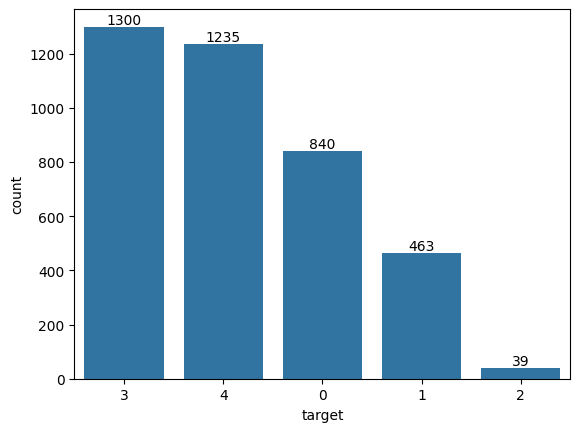

In [113]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, \
                             accuracy_score)

ax = sns.countplot(x=train['target'],
                   order=train['target'].value_counts(ascending=False).index)

abs_values = train['target'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

In [114]:
len(label)

3877

In [115]:
len(images)

3877

In [116]:
import numpy as np
import pandas as pd

In [117]:
data=np.array(images)


In [118]:
label=np.array(label)

In [119]:
data.shape

(3877, 180, 180, 3)

In [120]:
label.shape

(3877,)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(data, label, test_size=0.2,random_state=4)
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=1)

In [122]:
X_train.shape

(3101, 180, 180, 3)

In [123]:
X_test.shape

(776, 180, 180, 3)

In [128]:
y_test.shape

(776, 5)

In [125]:
import keras
num_classes = 5
y_train = keras.utils.to_categorical(y_train, num_classes)


In [126]:
y_test=keras.utils.to_categorical(y_test, num_classes)

In [127]:
y_test.shape

(776, 5)

In [129]:
y_train.shape

(3101, 5)

In [130]:
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input


In [131]:
vgg_model = EfficientNetB0(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3)) 

In [132]:
# let's make all layers non-trainable
for layer in vgg_model.layers : 
    layer.trainable = False

In [133]:
features_train=vgg_model.predict(X_train)

97/97 [==============================] - 39s 390ms/step


In [134]:
features_test=vgg_model.predict(X_test)

25/25 [==============================] - 9s 369ms/step


In [135]:
features_train.shape

(3101, 6, 6, 1280)

In [136]:
features_test.shape

(776, 6, 6, 1280)

In [137]:
num_train=X_train.shape[0]
num_test=X_test.shape[0]

In [138]:
x_test=features_test.reshape(num_test,-1)

In [139]:
y_train.shape

(3101, 5)

In [140]:
x_test.shape

(776, 46080)

In [141]:
x_train=features_train.reshape(num_train,-1)

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [143]:
x_train.shape

(3101, 46080)

In [144]:
model=Sequential([
                  Dense(1024,activation='relu'),
                   Dense(512,activation='relu'),
                  Dense(256,activation='relu'),
                  Dense(5,activation='softmax'),

])

In [145]:
x_test.shape

(776, 46080)

In [146]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [147]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

In [148]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
'''custom_early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001, 
    mode='min'
)'''

In [152]:
history=model.fit(x_train,y_train,batch_size=32,callbacks=[mcp_save,reduce_lr],epochs=4,validation_data=(x_test,y_test))

Epoch 1/4
97/97 [==============================] - 30s 311ms/step - loss: 0.0792 - accuracy: 0.9768 - val_loss: 1.4817 - val_accuracy: 0.7758 - lr: 0.0010
Epoch 2/4
97/97 [==============================] - 29s 301ms/step - loss: 0.0583 - accuracy: 0.9842 - val_loss: 1.4204 - val_accuracy: 0.7745 - lr: 0.0010
Epoch 3/4
97/97 [==============================] - 29s 302ms/step - loss: 0.0320 - accuracy: 0.9913 - val_loss: 1.7660 - val_accuracy: 0.7629 - lr: 0.0010
Epoch 4/4
97/97 [==============================] - 30s 305ms/step - loss: 0.0432 - accuracy: 0.9906 - val_loss: 1.5520 - val_accuracy: 0.8028 - lr: 0.0010


In [153]:
acc = model.evaluate(x_test, y_test)

25/25 [==============================] - 1s 28ms/step - loss: 1.5520 - accuracy: 0.8028


In [183]:
model.save('c:\\Users\\Rachit Patel\\DiseaseClassModel\\mediscan_nrfinal.h5')

c:\Users\Rachit Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [155]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [156]:
y_pred=model.predict(x_test)

25/25 [==============================] - 1s 29ms/step


In [157]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([3, 4, 4, 3, 4, 4, 3, 4, 1, 3, 1, 3, 0, 3, 0, 0, 0, 0, 3, 4, 1, 3,
       3, 4, 4, 4, 4, 0, 4, 4, 3, 3, 4, 0, 4, 4, 1, 3, 4, 0, 0, 3, 4, 3,
       4, 3, 0, 4, 3, 4, 4, 0, 0, 0, 0, 4, 4, 4, 3, 4, 4, 0, 4, 3, 3, 0,
       1, 4, 4, 4, 0, 3, 4, 3, 4, 3, 3, 4, 0, 4, 1, 3, 0, 3, 3, 4, 0, 3,
       3, 4, 4, 0, 3, 3, 4, 4, 0, 4, 3, 0, 3, 1, 4, 4, 3, 1, 0, 3, 0, 1,
       3, 0, 4, 3, 4, 3, 0, 3, 3, 4, 1, 4, 1, 0, 4, 3, 3, 3, 3, 4, 4, 1,
       4, 1, 3, 3, 4, 3, 3, 3, 4, 3, 4, 1, 3, 3, 3, 3, 1, 3, 4, 4, 4, 3,
       3, 1, 1, 0, 3, 3, 0, 0, 4, 3, 3, 4, 3, 1, 0, 0, 3, 3, 0, 3, 0, 0,
       3, 4, 3, 1, 3, 0, 0, 4, 0, 3, 3, 0, 3, 0, 1, 4, 1, 0, 3, 1, 3, 4,
       1, 0, 1, 3, 3, 0, 3, 0, 3, 0, 4, 3, 3, 3, 4, 0, 3, 3, 0, 0, 1, 4,
       1, 4, 1, 3, 4, 3, 0, 4, 4, 1, 3, 0, 1, 4, 0, 1, 4, 4, 1, 3, 3, 4,
       3, 4, 3, 1, 1, 4, 0, 4, 0, 3, 3, 4, 4, 3, 0, 3, 4, 0, 0, 3, 4, 0,
       3, 0, 4, 1, 4, 4, 4, 3, 3, 2, 1, 3, 3, 1, 4, 4, 4, 4, 4, 4, 1, 4,
       0, 3, 3, 4, 4, 1, 1, 3, 1, 4, 1, 4, 3, 4, 4,

In [158]:
y_test=np.argmax(y_test, axis=1)

In [159]:
y_test

array([3, 4, 3, 3, 4, 4, 3, 4, 1, 3, 1, 3, 0, 4, 0, 4, 3, 0, 3, 4, 1, 3,
       3, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 4, 1, 3, 4, 0, 0, 3, 3, 3,
       4, 3, 0, 4, 4, 4, 4, 0, 0, 0, 0, 4, 3, 4, 3, 4, 4, 0, 4, 3, 3, 0,
       1, 4, 4, 4, 3, 3, 4, 1, 1, 3, 4, 4, 0, 4, 1, 3, 0, 3, 3, 4, 0, 3,
       4, 4, 4, 0, 3, 3, 4, 4, 0, 4, 3, 0, 3, 1, 4, 4, 3, 1, 0, 3, 1, 1,
       3, 0, 4, 3, 4, 3, 0, 3, 3, 4, 1, 3, 3, 0, 4, 3, 4, 3, 3, 4, 4, 1,
       4, 1, 3, 3, 3, 4, 4, 3, 4, 3, 4, 1, 3, 4, 4, 3, 4, 3, 3, 4, 4, 3,
       3, 0, 0, 0, 3, 3, 0, 4, 4, 3, 3, 4, 3, 1, 0, 0, 4, 3, 0, 3, 0, 3,
       4, 4, 4, 1, 3, 3, 0, 4, 0, 3, 3, 4, 3, 0, 1, 4, 1, 0, 3, 1, 3, 4,
       1, 0, 1, 3, 3, 0, 3, 0, 0, 0, 4, 4, 0, 4, 4, 0, 3, 3, 0, 0, 1, 3,
       1, 4, 1, 3, 3, 3, 3, 4, 4, 0, 3, 3, 1, 4, 0, 1, 4, 4, 1, 0, 3, 3,
       3, 4, 3, 1, 1, 3, 0, 4, 0, 3, 3, 4, 4, 0, 0, 3, 3, 0, 0, 3, 4, 1,
       3, 0, 4, 1, 3, 4, 4, 4, 3, 2, 1, 3, 2, 1, 4, 4, 4, 0, 4, 3, 1, 0,
       0, 3, 3, 4, 4, 1, 1, 3, 1, 4, 1, 4, 3, 3, 4,

In [160]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

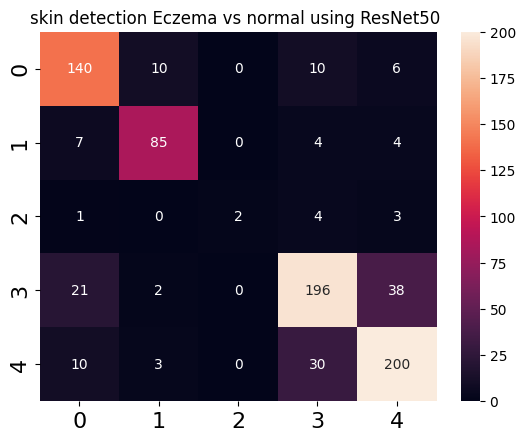

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt     
import pylab as pl
plt.title("skin detection Eczema vs normal using ResNet50 ")
plt.xticks(range(2), ['normal', 'Eczema'], fontsize=16)
plt.yticks(range(2), ['normal', 'Eczema'], fontsize=16)
ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

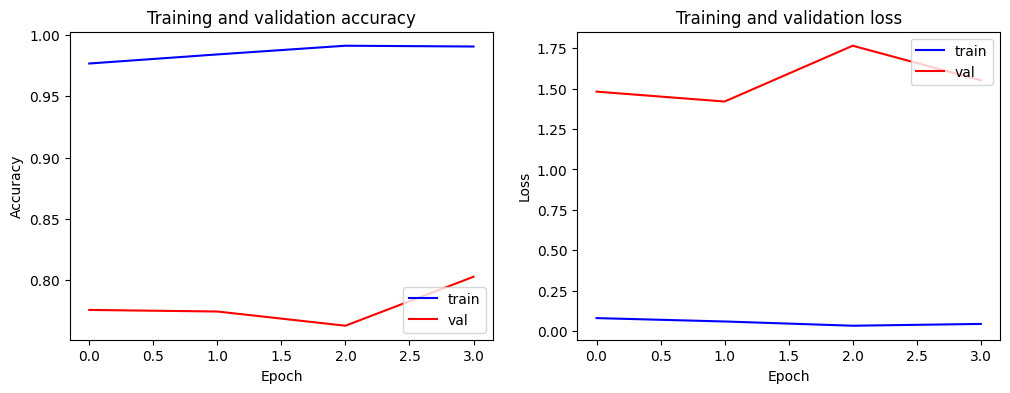

In [162]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))

# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [163]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [164]:
confusion_matrix=classification_report(y_test,y_pred2)



In [165]:
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       166
           1       0.85      0.85      0.85       100
           2       1.00      0.20      0.33        10
           3       0.80      0.76      0.78       257
           4       0.80      0.82      0.81       243

    accuracy                           0.80       776
   macro avg       0.85      0.70      0.72       776
weighted avg       0.81      0.80      0.80       776



In [166]:
def load_img(img_path):
    images=[]
    img=cv2.imread(img_path)
    img=cv2.resize(img,(180,180))
    images.append(img)
    x_test=np.asarray(images)
    test_img=preprocess_input(x_test)
    features_test=vgg_model.predict(test_img)
    num_test=x_test.shape[0]
    f_img=features_test.reshape(1, -1)

    return f_img


In [181]:
img=load_img("C:\\Users\\Rachit Patel\\Downloads\\download (1).jpg")

1/1 [==============================] - 0s 44ms/step


In [182]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 44ms/step


3